In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Standard Linear Regression

In [14]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [15]:
from enum import auto
# fetch dataset
automobile = fetch_ucirepo(id=10)

# Features
continuous_features = ['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower',
       'compression-ratio', 'stroke', 'bore', 'engine-size',
       'num-of-cylinders', 'curb-weight', 'height', 'width',
       'length', 'wheel-base', 'num-of-doors']

# Label for prediction
label = ['normalized-losses']

# putting all data together so we can drop NA values on everything
automobile_data = automobile.data.features[continuous_features + label].dropna()
X = automobile_data[continuous_features]
y = automobile_data[label]

In [16]:
## Fit Linear Model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [17]:
## Analyze Coefficients Theta
coefficients = model.coef_[0]
pd.Series(coefficients, index=continuous_features)

,0
price,0.001035
highway-mpg,4.748127
city-mpg,-5.828674
peak-rpm,0.011369
horsepower,-0.211773
compression-ratio,0.251226
stroke,-3.350064
bore,-12.076633
engine-size,-0.366029
num-of-cylinders,9.749903


In [18]:
## See if the model looks good
X.shape

(159, 16)

## Linear Regression to Learn a Time Series

In [19]:
# fetch dataset
istanbul_stock_exchange = fetch_ucirepo(id=247)

# data (as pandas dataframes)
istanbul_stock_exchange_data = istanbul_stock_exchange.data.features
istanbul_stock_exchange_data = istanbul_stock_exchange_data.loc[:,~istanbul_stock_exchange_data.columns.duplicated()].copy()
istanbul_stock_exchange_data['date'] = pd.to_datetime(istanbul_stock_exchange_data['date'])
time_series = istanbul_stock_exchange_data.set_index("date")['ISE']

<ipython-input-19-1877281698>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  istanbul_stock_exchange_data['date'] = pd.to_datetime(istanbul_stock_exchange_data['date'])


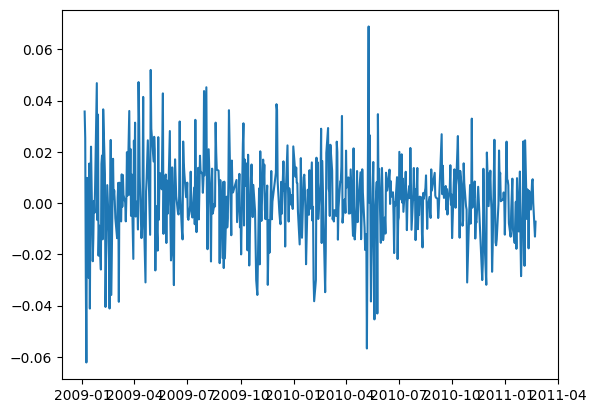

In [20]:
plt.plot(time_series)

In [21]:
## How do we learn dynamics from our observations y?
X = pd.DataFrame(time_series[:-1])
X['const'] = 1
y = time_series[1:]

X = X.to_numpy()
y = y.to_numpy()

## Implied model:
# y(t) = alpha* y(t-1) + beta + gamma * u(t-1) + gamma2* u(t-2)
# Coefficients tell us alpha = 0.0187, beta = 0

In [22]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [23]:
## Analyze model coefficients
model.coef_

array([0.01868705, 0.        ])

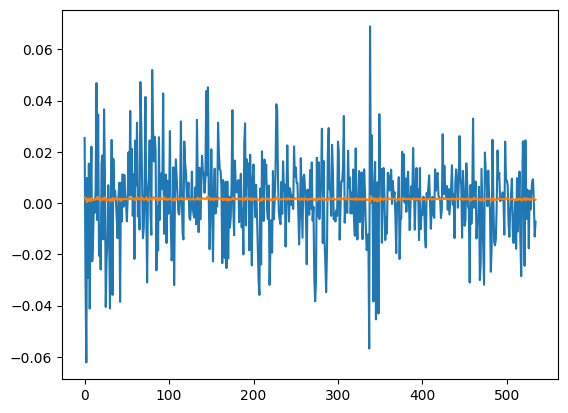

In [24]:
## Evaluate model
y_pred = model.predict(X)
plt.plot(y)
plt.plot(y_pred)